타이타닉 생존자 예측을 위한 EDA
**생존자 데이터 분석에서 나이,성별 중요함**
1. 시각화 하기전 필요한 라이브러리 준비
2. 한국어 준비
3. 데이터 불러와서 pandas형태로 변환하기
    3-1. 엑셀파일 복합키는 다루기힘드니까 지우고 사용하기
4. info() 로 데이터 구성 확인하기
    4-1. 결측치 가능한한 개수 맞추고, 과하게 비는 데이터는 과감히 버리기
    4-2. 문자열은 숫자열로 변경하기
5. 


In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
# 한국어폰트(윈도우)
plt.rcParams["font.family"] = "Malgun Gothic"
# 맥 => AppleGothic

plt.rcParams["axes.unicode_minus"] = False

In [12]:
# 타이타닉 데이터 불러오기 (pandas)
import seaborn as sns
df=sns.load_dataset("titanic")
df.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [13]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [14]:
# df정보

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [15]:
# 결측치 확인 => 데이터 어떻게 채울지 고민하기
# deck포기 
# age는 뭐로채우지? 평균값으로 채우기
# embarked는 뭐로 채우지? 평균? 문자열..? 빈도로 채우기

missing_value = df.isnull().sum()
missing_percent = (missing_value/len(df))*100
missing_percent

survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64

In [ ]:
# 나이채우기
# 경고수정하기 inplace
df["age"] = df["age"].fillna(df["age"].mean())
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [17]:
# embarked채우기 (최빈도)
# 유튜브 박조은 todaycode
df["embarked"].mode()[0]

'S'

In [18]:
df["embarked"]=df["embarked"].fillna(df["embarked"].mode()[0])
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     891 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


생존자 현황

In [ ]:
# 생존자 수
survived_count = df["survived"].value_counts()

# 생존자 비율
survived_rate = df["survived"].mean()
print(f"생존자:{survived_count[1]}명")
print(f"사망자:{survived_count[0]}명")
print(f"생존율:{survived_rate:.2%}")

생존자:342명
사망자:549명
생존율:38.38%


In [27]:
# 카테시안곱 -> 두 집합의 모든 가능한 쌍을 만드는 조합
# 경우의 수를 만들어줌
pd.crosstab(df["sex"],df["survived"])

survived,0,1
sex,,
female,81,233
male,468,109


<Axes: xlabel='sex'>

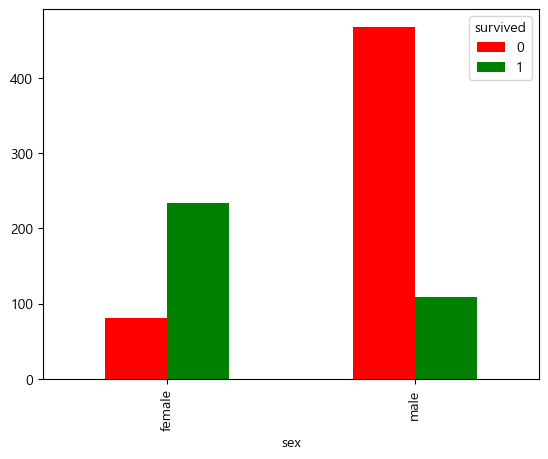

In [ ]:
# 1. 교차표 만들기 pd.crosstab()
# 	 : 성별 vs 생존여부 도수표 만들기
gender_survival_counts = pd.crosstab(df["sex"],df["survived"])


# 2. 막대그래프 그리기
#    :빨강(사망)/초록(생존) 막대그래프
gender_survival_counts.plot(kind="bar",color=["red","green"])

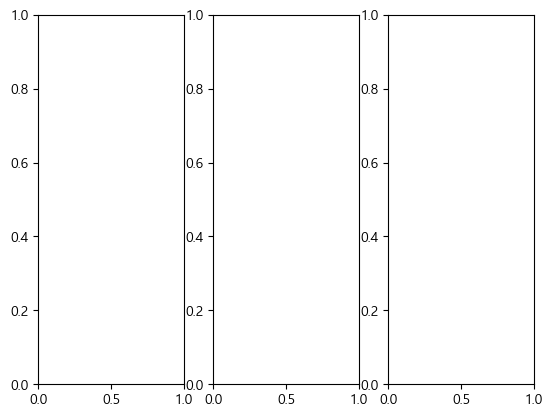

In [ ]:
# 다음시간 그래프 이렇게 만들거임
fig, axes = plt.subplots(1,3)